<a href="https://colab.research.google.com/github/absallh/selected_1/blob/master/selected_image_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#download dataset from kaggle

In [ ]:
#set up kaggle
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mahmoudreda55/satellite-image-classification
!unzip satellite-image-classification; rm -v satellite-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/cloudy/train_23598.jpg  
  inflating: data/cloudy/train_23608.jpg  
  inflating: data/cloudy/train_23634.jpg  
  inflating: data/cloudy/train_23636.jpg  
  inflating: data/cloudy/train_23646.jpg  
  inflating: data/cloudy/train_2366.jpg  
  inflating: data/cloudy/train_23664.jpg  
  inflating: data/cloudy/train_23706.jpg  
  inflating: data/cloudy/train_2380.jpg  
  inflating: data/cloudy/train_23805.jpg  
  inflating: data/cloudy/train_23806.jpg  
  inflating: data/cloudy/train_23826.jpg  
  inflating: data/cloudy/train_23843.jpg  
  inflating: data/cloudy/train_23877.jpg  
  inflating: data/cloudy/train_23884.jpg  
  inflating: data/cloudy/train_23953.jpg  
  inflating: data/cloudy/train_2396.jpg  
  inflating: data/cloudy/train_23978.jpg  
  inflating: data/cloudy/train_23979.jpg  
  inflating: data/cloudy/train_23980.jpg  
  inflating: data/cloudy/train_23981.jpg  
  inflating: data/cloudy/train_24001.jpg  
  infl

#Loading and Displaying data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.svm import SVC
from sklearn import metrics
from statistics import mean
from sklearn.metrics import auc
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import roc_curve
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import os

In [2]:
# Defining the data directory and categories to import data
DATADIR = "/content/data"
CATEGORIES = ['cloudy', 'desert', 'green_area', 'water']

Image shape : (256, 256, 3) 



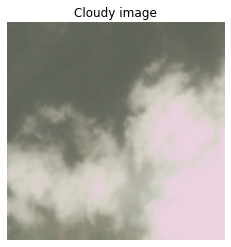

In [3]:
img_test = cv2.imread("data/cloudy/train_12.jpg") # I picked a random image
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB) # Converting from BGR to RGB to see the right colors
img_shape = img_test.shape # Get the shape of an image 
print('Image shape :',img_shape,'\n')
plt.imshow(img_test)
plt.axis('off')
plt.title('Cloudy image')
plt.show()

In [4]:
#Defining the main parameters
IMG_SIZE = img_shape[0]
CHANNELS = img_shape[2]
BATCH_SIZE = 64

In [5]:
#import data with image_dataset_from_directory 

train_ds = tf.keras.utils.image_dataset_from_directory(
    DATADIR,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = BATCH_SIZE,
    image_size = (IMG_SIZE,IMG_SIZE),
    shuffle = True,
    seed = 27,
    validation_split = 0.2,
    subset = 'training'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATADIR,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = BATCH_SIZE,
    image_size = (IMG_SIZE,IMG_SIZE),
    shuffle = True,
    seed = 27,
    validation_split = 0.2,
    subset = 'validation'
)

print('Classes : ',train_ds.class_names)

Found 5631 files belonging to 4 classes.
Using 4505 files for training.
Found 5631 files belonging to 4 classes.
Using 1126 files for validation.
Classes :  ['cloudy', 'desert', 'green_area', 'water']


#preprocessing

In [6]:
#rescaling and augmenting the data 
rescale = tf.keras.Sequential([layers.Rescaling(1./255)])
augment = tf.keras.Sequential([
    preprocessing.RandomFlip(mode='horizontal'),
    preprocessing.RandomFlip(mode='vertical'),
    preprocessing.RandomRotation(factor=0.3),
])

In [7]:
#cross validation
skf = StratifiedKFold(n_splits=5)

#ANN

##build the model

In [8]:
def build_model_ANN():
  model =  tf.keras.Sequential([

  rescale,
  augment,

  layers.Dense(32, activation='relu', input_shape=(BATCH_SIZE,IMG_SIZE,IMG_SIZE,3)),
  layers.MaxPool2D(pool_size=(2, 2), padding = 'same'),
  layers.Dense(64, activation='relu'),
  layers.MaxPool2D(pool_size=(2, 2)),
  layers.Dense(128, activation='relu'),
  layers.MaxPool2D(pool_size=(2, 2)),
  layers.Flatten(),
  layers.Dense(32),

  layers.Dense(4,activation='softmax')
  ])

  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      loss='sparse_categorical_crossentropy', 
      metrics=['accuracy'])
  return model

##train the model without cross validation

In [9]:
model = build_model_ANN()
history = model.fit(
    train_ds, 
    batch_size = BATCH_SIZE,
    validation_data = val_ds, 
    epochs = 10)

Epoch 1/10
71/71 [==============================] - 240s 3s/step - loss: 0.4848 - accuracy: 0.8142 - val_loss: 0.2382 - val_accuracy: 0.8766
Epoch 2/10
71/71 [==============================] - 235s 3s/step - loss: 0.1904 - accuracy: 0.9199 - val_loss: 0.1502 - val_accuracy: 0.9405
Epoch 3/10
71/71 [==============================] - 244s 3s/step - loss: 0.1718 - accuracy: 0.9261 - val_loss: 0.1426 - val_accuracy: 0.9467
Epoch 4/10
71/71 [==============================] - 238s 3s/step - loss: 0.1690 - accuracy: 0.9265 - val_loss: 0.3392 - val_accuracy: 0.8250
Epoch 5/10
71/71 [==============================] - 239s 3s/step - loss: 0.1763 - accuracy: 0.9230 - val_loss: 0.1443 - val_accuracy: 0.9378
Epoch 6/10
71/71 [==============================] - 238s 3s/step - loss: 0.1541 - accuracy: 0.9305 - val_loss: 0.1343 - val_accuracy: 0.9440
Epoch 7/10
71/71 [==============================] - 238s 3s/step - loss: 0.1528 - accuracy: 0.9314 - val_loss: 0.1797 - val_accuracy: 0.9192
Epoch 8/10
71

###validate the model

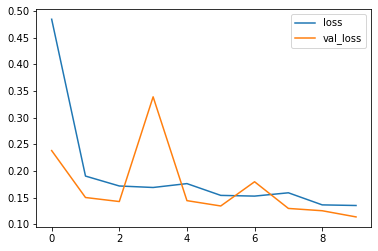

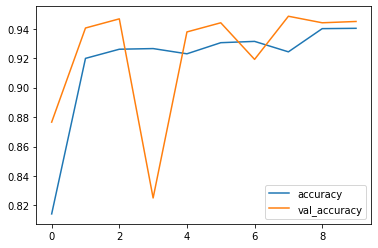

In [10]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss', 'val_loss']].plot()
history_df.loc[:,['accuracy', 'val_accuracy']].plot()

In [11]:
model.evaluate(val_ds)

18/18 [==============================] - 15s 826ms/step - loss: 0.1137 - accuracy: 0.9449


[0.11372752487659454, 0.9449378252029419]

In [12]:
def plot_validation(pred, y):
  fpr_keras, tpr_keras, thresholds_keras = roc_curve(y, pred)
  auc_keras = auc(fpr_keras, tpr_keras)
  plt.figure(1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.show()

  print()
  
  conf_matrix = confusion_matrix(y, np.round(abs(pred)))
  fig, ax = plt.subplots(figsize=(7.5, 7.5))
  ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
  
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()

In [13]:
def print_conf_mat(pred, y_values):
  cf_matrix = confusion_matrix(y_values,pred)
  df_cf_matrix = pd.DataFrame(cf_matrix, index = [i for i in range(4)],
                    columns = [i for i in range(4)])

  fig, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(df_cf_matrix, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='d')
  ax.set_xticklabels(('Cloudy','Desert','Green area','Water'))
  ax.set_yticklabels(('Cloudy','Desert','Green area','Water'))


  plt.title('confusion matrix')

  plt.show()

  print(classification_report(y_values,pred)) # 0 = Cloudy, 1 = desert, 2 = green_area, 3 = water

In [14]:
true = np.array([])
pred = np.array([])

i = 0
for data, labels in val_ds :
    i += 1
    y = np.argmax(model.predict(data), axis=1)
    true = np.append(true, labels)
    pred = np.append(pred, y)
  
    if i == val_ds.cardinality().numpy() + 1:
        break


cloudy


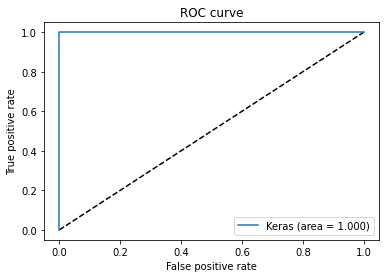

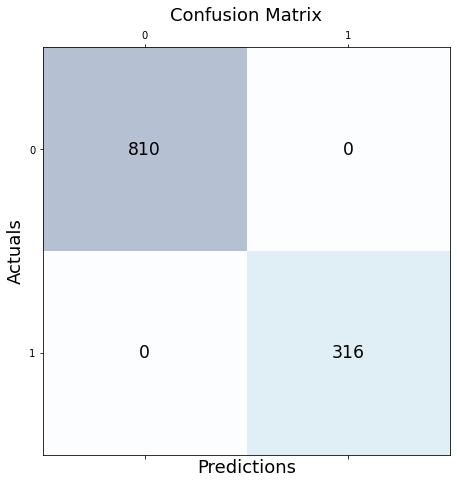

desert


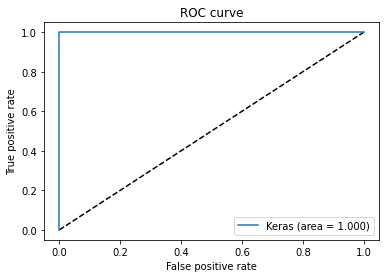

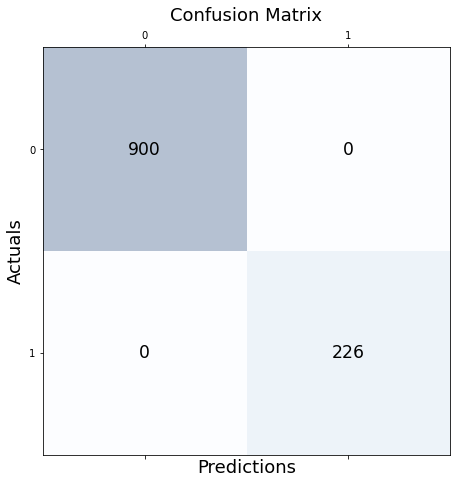

green_area


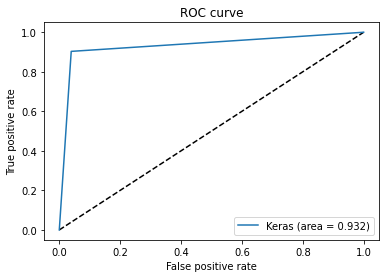

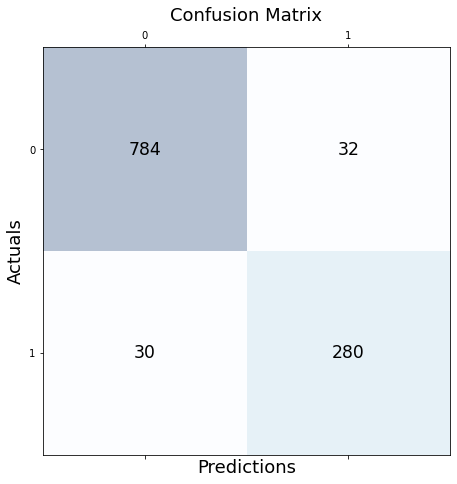

water


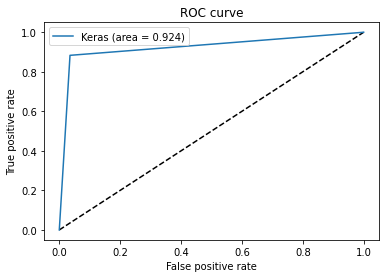

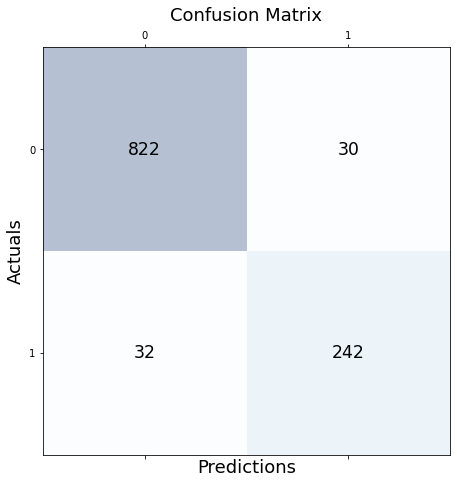

In [15]:
from tensorflow.keras.utils import to_categorical

for index, label in enumerate(CATEGORIES):
  print(label)
  plot_validation(to_categorical(pred)[:,index], to_categorical(true)[:,index])

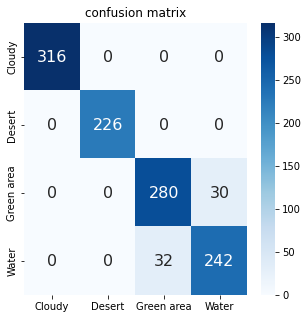

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       316
         1.0       1.00      1.00      1.00       226
         2.0       0.90      0.90      0.90       310
         3.0       0.89      0.88      0.89       274

    accuracy                           0.94      1126
   macro avg       0.95      0.95      0.95      1126
weighted avg       0.94      0.94      0.94      1126



In [16]:
print_conf_mat(pred, true)

#SMV

##load the dataset

In [ ]:
freatures = []
labels = []
for catagory in CATEGORIES:
  path = os.path.join(DATADIR, catagory)
  label = CATEGORIES.index(catagory)

  for img in os.listdir(path):
    imgpath = os.path.join(path, img)
    pet_img = cv2.imread(imgpath, 0)
    try:
      pet_img = cv2.resize(pet_img, (IMG_SIZE, IMG_SIZE))
    except Exception as e:
      pass
    image = np.array(pet_img, dtype=float).flatten()
    freatures.append(image)
    labels.append(label)
freatures = np.array(freatures, dtype=float)
vector = np.vectorize(np.int)
labels = vector(labels)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(freatures, labels, random_state = 1, test_size = 0.2)

##train without cross validation

In [ ]:
# create classifier
svc = SVC(kernel='linear')

In [ ]:
# train model
svc.fit(X_train, y_train)

SVC(kernel='linear')

###validate the model

In [ ]:
#Evaluating the Model
y_pred = svc.predict(X_test)#Predict the response for test dataset
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6175687666370896


cloudy


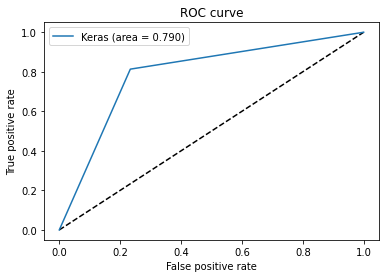

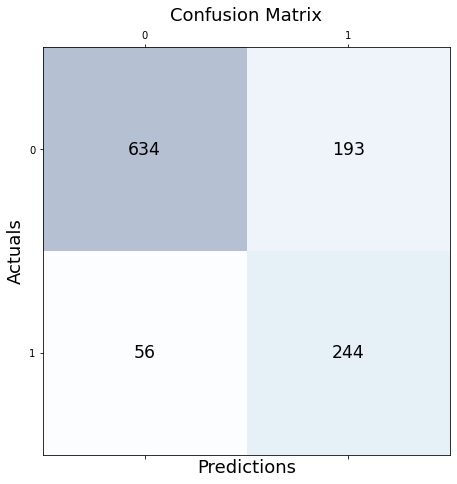

desert


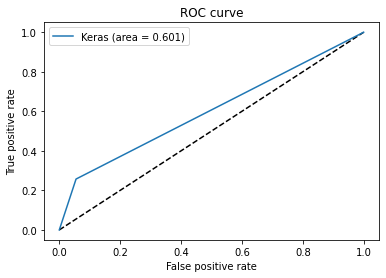

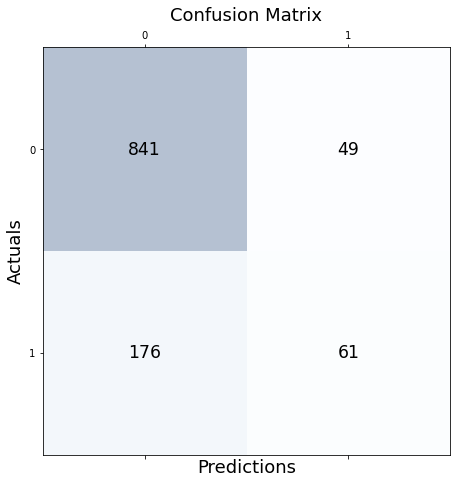

green_area


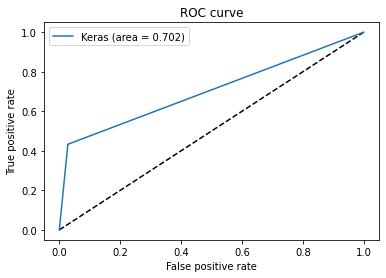

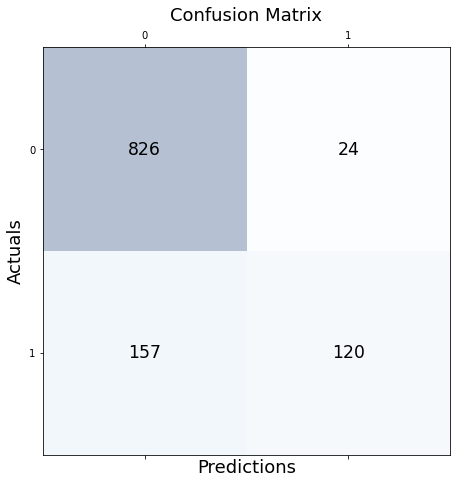

water


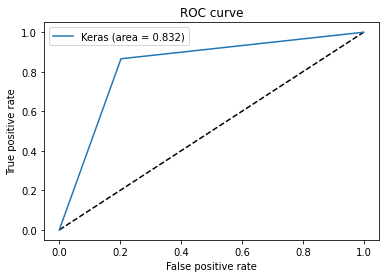

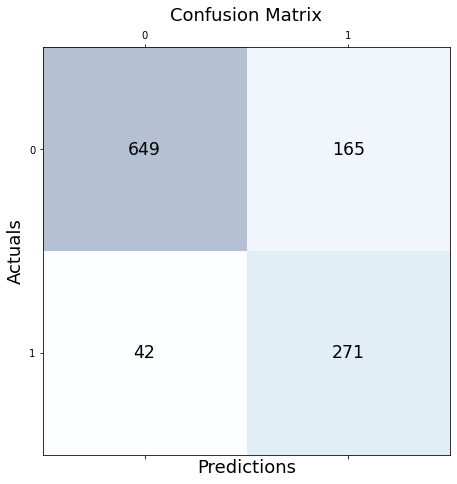

In [ ]:
from tensorflow.keras.utils import to_categorical

for index, label in enumerate(CATEGORIES):
  print(label)
  plot_validation(to_categorical(y_pred)[:,index], to_categorical(y_test)[:,index])

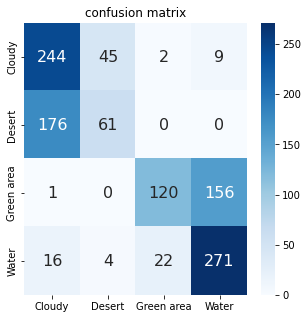

              precision    recall  f1-score   support

           0       0.56      0.81      0.66       300
           1       0.55      0.26      0.35       237
           2       0.83      0.43      0.57       277
           3       0.62      0.87      0.72       313

    accuracy                           0.62      1127
   macro avg       0.64      0.59      0.58      1127
weighted avg       0.64      0.62      0.59      1127



In [ ]:
print_conf_mat(y_pred, y_test)

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
def plot_learning_curve(
    estimator, title, X, y, axes=None, ylim=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
): 
    if axes is None:
        _, axes = plt.subplots(1, 2, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

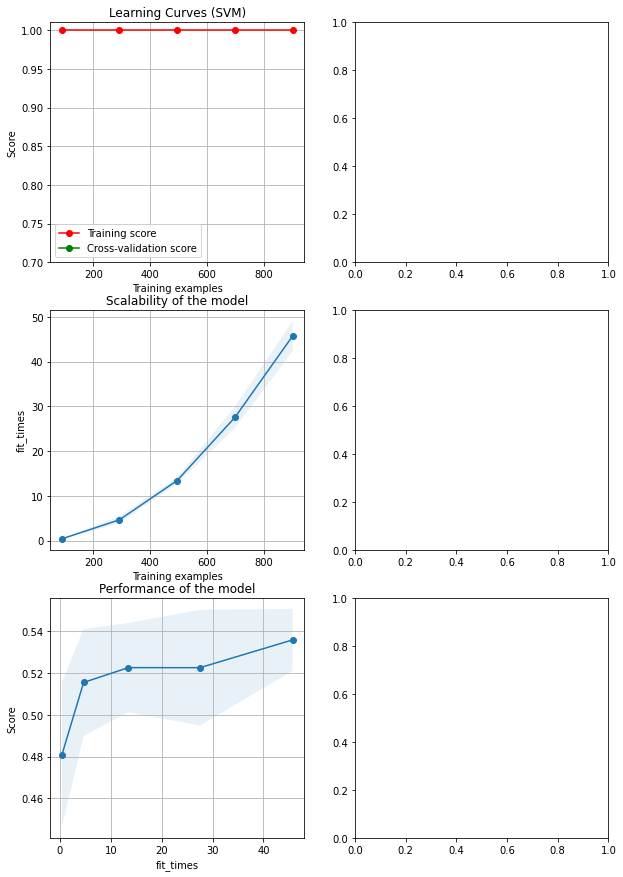

In [17]:
title = "Learning Curves (SVM)"
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
plot_learning_curve(
    svc, title, X_test, y_test, axes=axes[:,0], ylim=(0.7, 1.01)
)


##train with cross validation

In [ ]:
# create classifier
all_svc = SVC(kernel='linear')
all_acc = []

In [ ]:
import gc
for train_indices, test_indices in skf.split(X_train, y_train):
  gc.collect()
  all_svc.fit(X_train[train_indices], y_train[train_indices])
  y_pred = all_svc.predict(X_train[test_indices])#Predict the response for test dataset
  acc = metrics.accuracy_score(y_train[test_indices], y_pred)
  print("Accuracy:",acc)
  all_acc.append(acc)

Accuracy: 0.6026637069922308
Accuracy: 0.6104328523862376
Accuracy: 0.5715871254162043
Accuracy: 0.5993340732519423
Accuracy: 0.6033333333333334


###test the model

In [ ]:
max(all_acc)

0.6104328523862376

In [ ]:
min(all_acc)

0.5715871254162043

In [ ]:
mean(all_acc)

0.5974702182759897

In [ ]:
pred = all_svc.predict(X_test)

[2 1 0 ... 0 3 3]


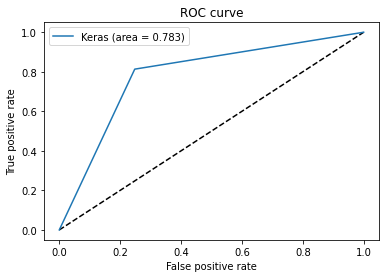

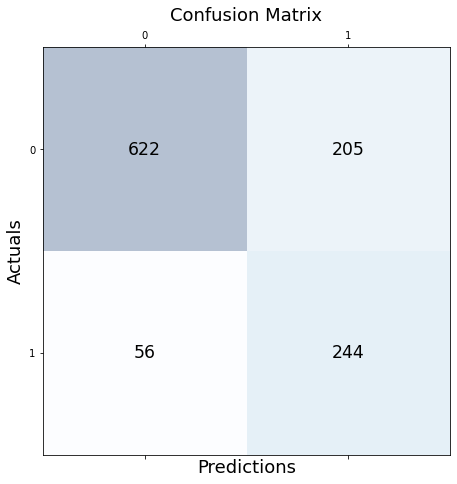

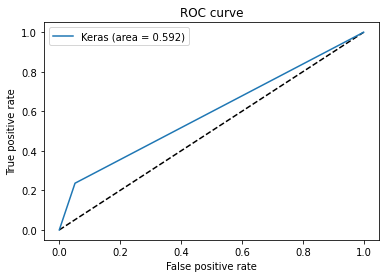

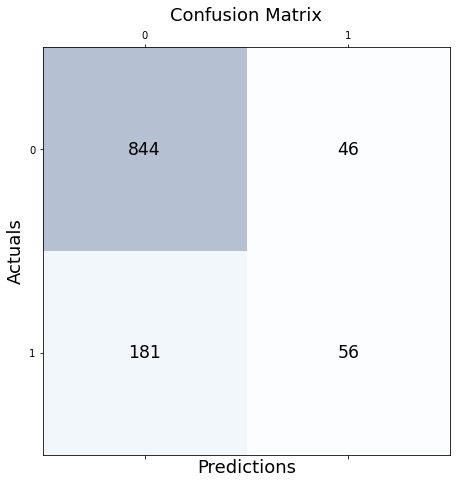

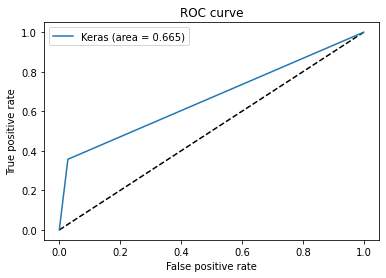

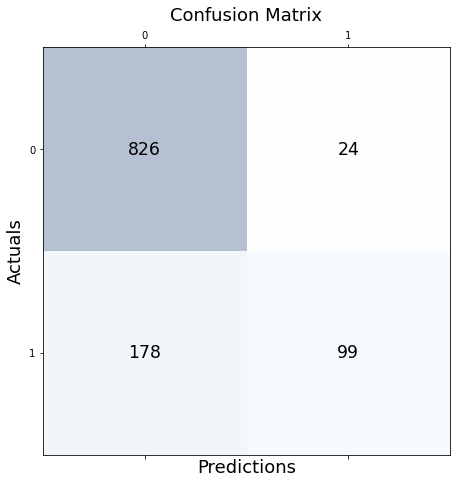

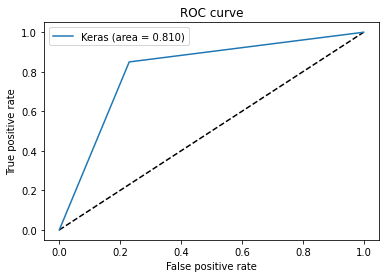

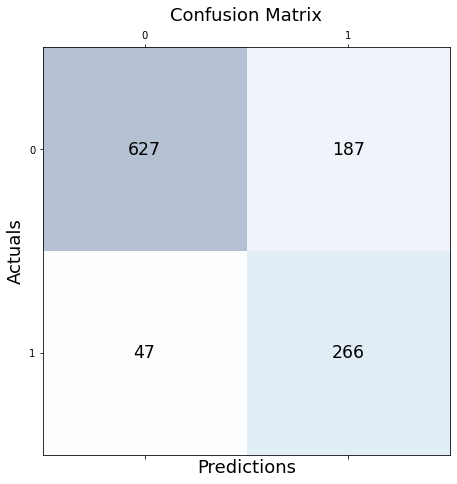

In [ ]:
from tensorflow.keras.utils import to_categorical
print(pred)
for index, label in enumerate(CATEGORIES):
  plot_validation(to_categorical(pred)[:,index], to_categorical(y_test)[:,index])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

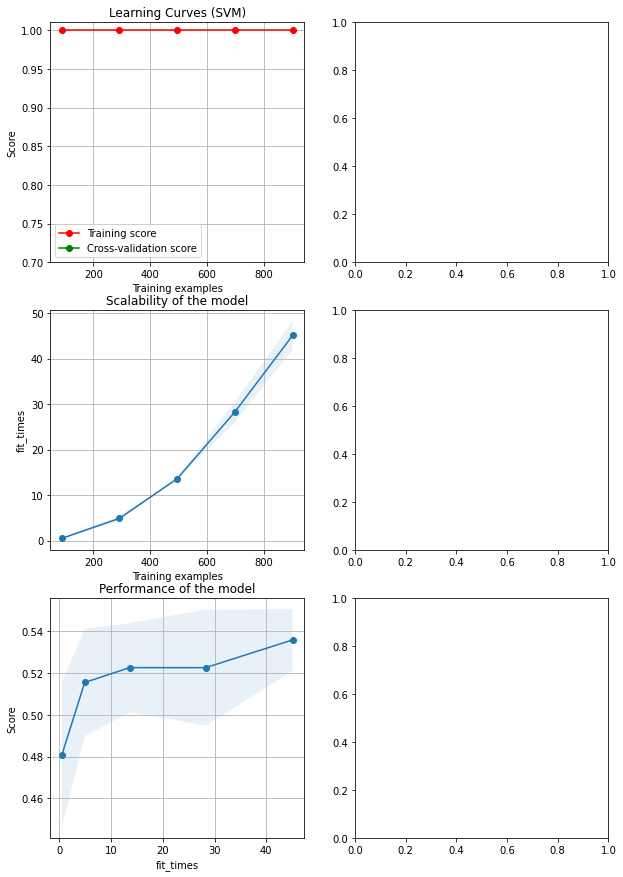

In [ ]:
title = "Learning Curves (SVM)"
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
plot_learning_curve(
    all_svc, title, X_test, y_test, axes=axes[:,0], ylim=(0.7, 1.01)
)


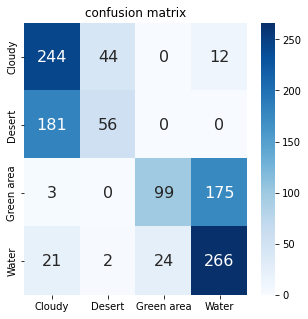

              precision    recall  f1-score   support

           0       0.54      0.81      0.65       300
           1       0.55      0.24      0.33       237
           2       0.80      0.36      0.50       277
           3       0.59      0.85      0.69       313

    accuracy                           0.59      1127
   macro avg       0.62      0.56      0.54      1127
weighted avg       0.62      0.59      0.56      1127



In [ ]:
print_conf_mat(pred, y_test)